# Exercício - Regressão Linear

## E-commerce: App & Web

O dataset para este exercício foi retirado do site www.kaggle.com. Este dataset é referente uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas on-line, mas elas também têm sessões de aconselhamento sobre estilo e roupas na loja. Os clientes entram na loja, realizam sessões / reuniões com um estilista pessoal e podem ir para casa e pedir em um aplicativo móvel ou site para as roupas que desejam.

A empresa está tentando decidir se deve concentrar seus esforços na experiência de aplicativos para dispositivos móveis ou no site. Eles o contrataram por contrato para ajudá-los a descobrir!

**Trabalharemos com o arquivo csv dos clientes de comércio eletrônico da empresa. Possui informações do cliente, como email, endereço e avatar colorido. Também possui colunas de valores numéricos:**

* Avg. Session Length: Média das sessões de aconselhamento no estilo da loja.
* Time on App: tempo médio gasto no aplicativo em minutos.
* Time on Website:  tempo médio gasto no site em minutos.
* Length of Membership: Tempo em anos que o consumidor é cliente. 


## Vamos começar!



## Importando as bibliotecas

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carregando os dados



**Leia no arquivo csv 'Ecommerce Customers' como um DataFrame chamado customers.**

In [27]:
customers = pd.read_csv('Ecommerce Customers')

**Confira as informações do Dataset**

In [28]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


**Análise exploratória**

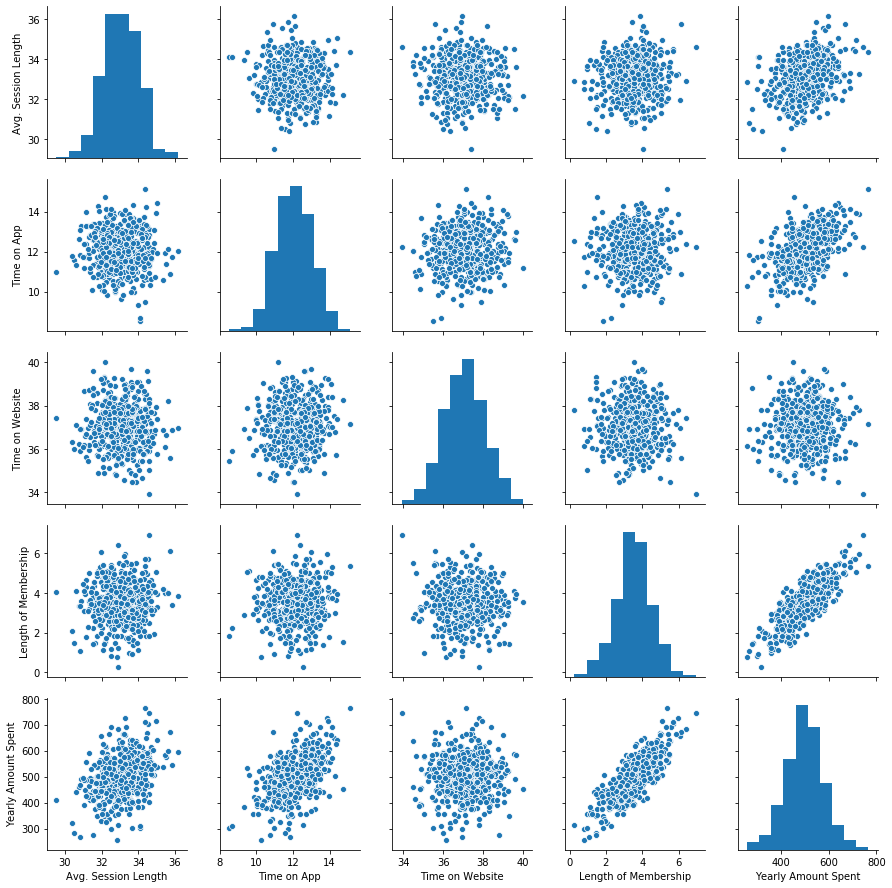

In [29]:
sns.pairplot(customers)

## Dados de treinamento e teste

Agora que exploramos um pouco os dados, vamos dividir os dados em conjuntos de treinamento e teste.

In [30]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [31]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

**Use model_selection.train_test_split do sklearn para dividir os dados em conjuntos de treinamento e teste.** 

**Defina test_size = 0.3 e random_state = 101**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

### Regressão Linear dos mínimos quadrados ordinários

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Avaliando o modelo

In [37]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Previsões do modelo

Vamos avaliar as previsões do nosso conjunto de testes!

In [38]:
predictions = lm.predict( X_test)

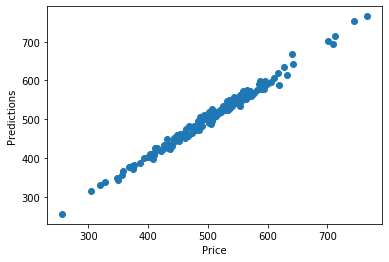

In [39]:
plt.scatter(y_test,predictions)
plt.xlabel('Price')
plt.ylabel('Predictions')
plt.show()

### Métricas de avalição

In [40]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


## Discuta os resultados

Ainda queremos descobrir a resposta para a pergunta original. Concentramos nosso esforço no desenvolvimento de aplicativos para dispositivos móveis ou sites? Ou talvez isso realmente não importe, e o tempo de associação é o que é realmente importante.


**Vamos ver se podemos interpretar os coeficientes para ter uma ideia:**


**Você acha que a empresa deveria se concentrar mais no aplicativo para celular ou no site?**